# Image Classification using CNN (TensorFlow)

In [ ]:
pip install tensorflow matplotlib

In [4]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Step 2: Load and Prepare the Dataset (CIFAR-10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shape
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 75s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


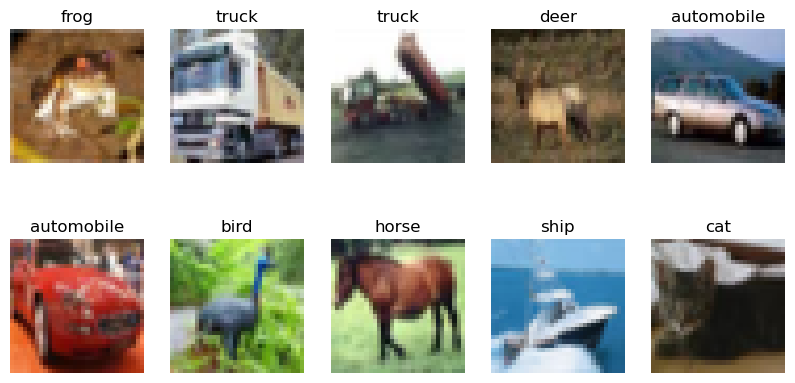

In [6]:
# Step 3: Visualize Some Sample Images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [7]:
# Step 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()


C:\Users\HP\Documents\Python Scripts\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.3274 - loss: 1.8281 - val_accuracy: 0.5339 - val_loss: 1.3158
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5540 - loss: 1.2560 - val_accuracy: 0.6030 - val_loss: 1.1312
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6191 - loss: 1.0858 - val_accuracy: 0.6417 - val_loss: 1.0196
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.6593 - loss: 0.9749 - val_accuracy: 0.6529 - val_loss: 0.9727
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6876 - loss: 0.8935 - val_accuracy: 0.6648 - val_loss: 0.9670
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7074 - loss: 0.8412 - val_accuracy: 0.6937 - val_loss: 0.8911
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.7268 - loss: 0.7876 - val_accuracy: 0.6927 - val_loss: 0.8839
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7393 - loss: 0.7414 - 

In [10]:
# Step 7: Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")


313/313 - 3s - 8ms/step - accuracy: 0.7068 - loss: 0.8466

✅ Test Accuracy: 0.71


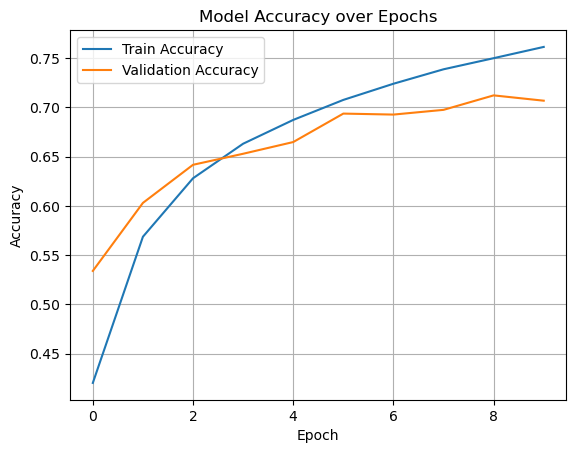

In [11]:
# Step 8: Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
